<a href="https://colab.research.google.com/github/itsmesudhanshu/Coronavirussentiment/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coronavirus Tweet Sentiment Analysis**
##Project Type - Classification
##Contribution - Team
### Team member 1 : Sudhanshu Chouhan
### Team member 2 : Kapil Narayan Singh













#**Problem Statement**
In this Project we have given the data set of tweets done by the people during the coronavirus pandemic from various countries.
We have to see in this data what type of comment that has been done during the pandemic.
We get to know from our data that there are five types of sentiment that are extremely positive, extremely negative , positive, negative and neutral.
From various classification algorithm we have to find out that whether the tweet that has been made belongs to which type of sentiment.

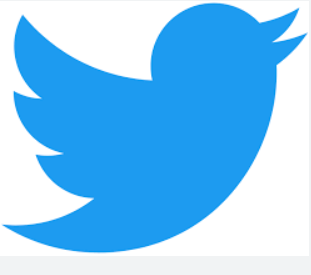

Import libraries

In [286]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as cr  
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import pylab as p
pd.to_numeric
from matplotlib import pyplot as plt

In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
data= pd.read_csv('/content/drive/MyDrive/coronavirus sentiment/Coronavirus Tweets.csv', encoding="ISO-8859-1")

     

# Dataset First View

In [289]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [290]:


data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [291]:

data.tail()

UserName  ScreenName                      Location     TweetAt  \
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

##Dataset Rows and Columns count

In [292]:
data.shape

(41157, 6)

## Dataset Information

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB





## Duplicate Values

In [294]:


data.duplicated().sum()

0

##Missing Values/Null Values Count

In [295]:


data.isna().sum().sort_values(ascending = False).head()

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
dtype: int64

<AxesSubplot:>

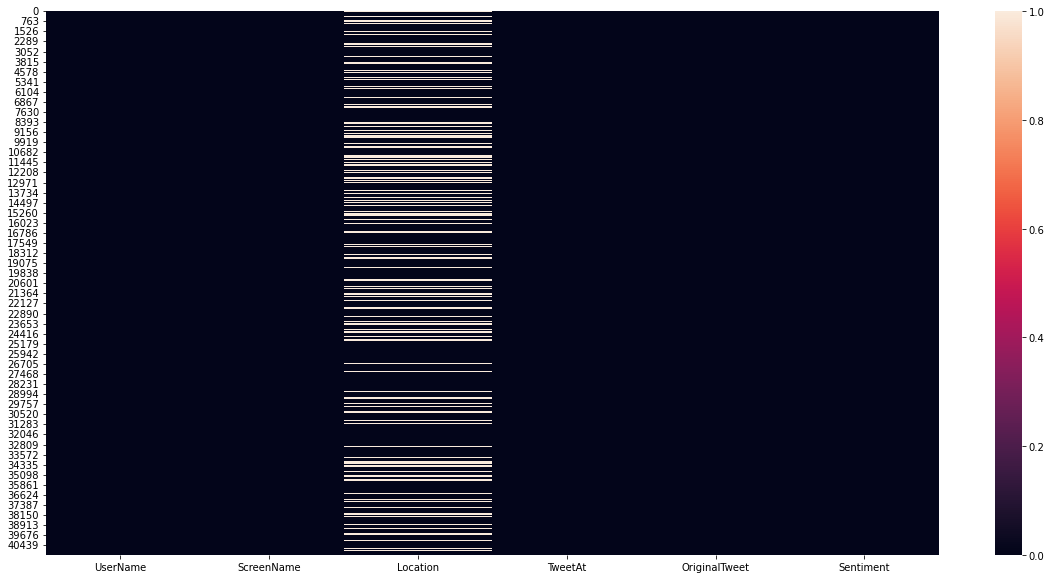

In [296]:

# let's plot a Heatmap to check the Nan values
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())


## Knowing Dataset

##2.Understanding Variables

In [297]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [298]:


data.describe()

UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000

Variable Description
1.Username is Coded Username

2.ScreenName is Coded Screen name

3.Location is Region of origin of tweet.

4.Tweet at is Tweet timing.

5.OriginalTweet is First tweet in the thread.

6.Sentiment which is target Variable.

##Checking Unique values for each Variables.

In [299]:


data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [300]:


data.Location.nunique()

12220

From this we get to know that unique value is relevant for only sentiment column or target variable.

#Data Wrangling

##Data Wrangling Code

In [301]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()
     

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


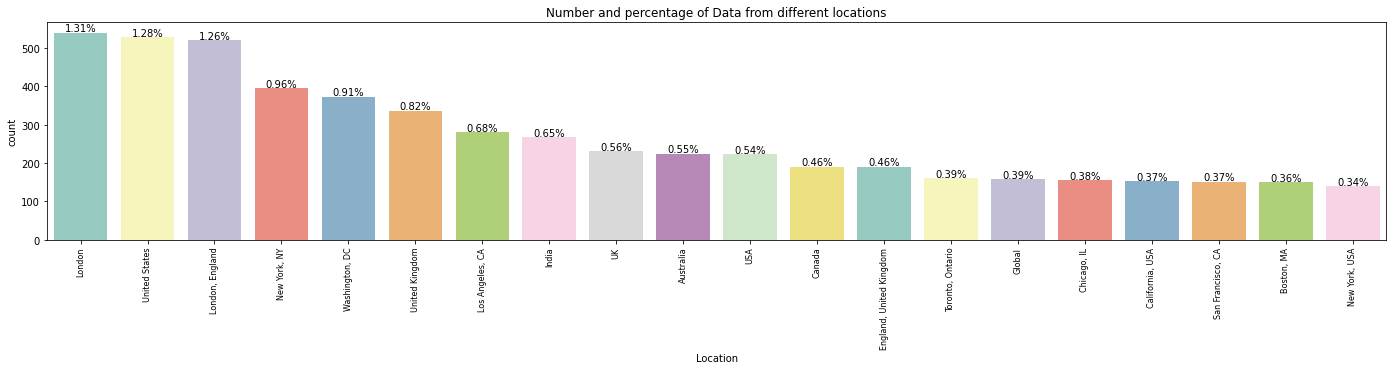

In [302]:


# Percentage of data from different locations
data_source("Location", "Data from different locations", data, 6)
     

The above observation shows that the number of data percentage wise from each country that of total data present. We can see that mainly United kingdom,United states of america , Indian and Canada are the countries from where tweet has been done. 

In [303]:

# Plot unique value across different columns
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe
     

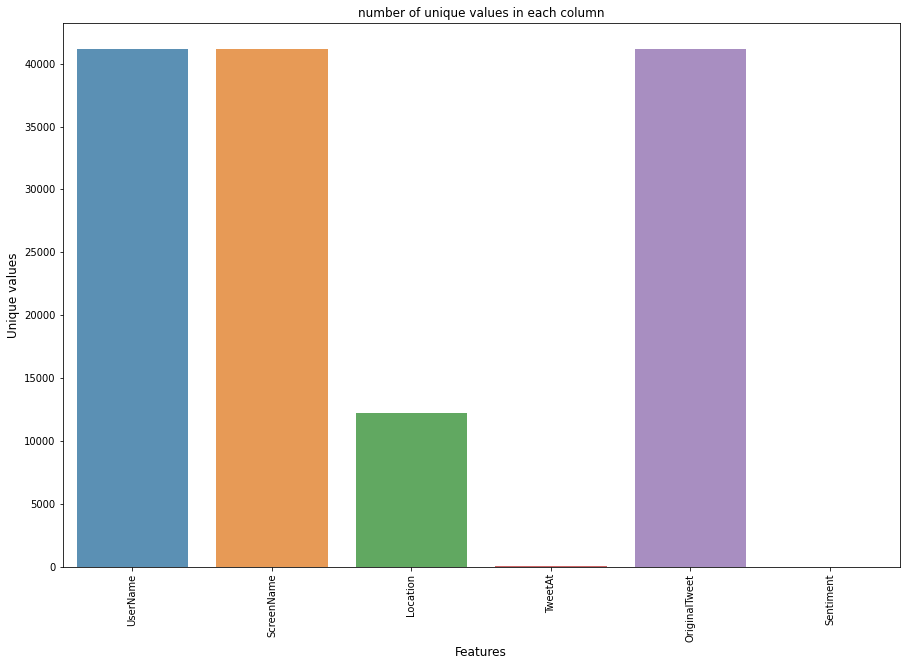

In [304]:
unique_data = unique_values(data)
f, ax = plt.subplots(1,1, figsize=(15,10))
sns.barplot(x=unique_data['Features'], y=unique_data['Uniques'], alpha=0.8)
plt.title('number of unique values in each column')
plt.ylabel('Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

The number of unique value in different feature are as followed Username , ScreenName , OriginalTweet has unique values of around 40000 then followed by Location that is between 10000-15000. 


#Sample text of Sentiment.

In [305]:





data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

##Here we can see that the number of positive sentiment is highest.

#Now we will anlalyse the data in which we will  see the types of comment that are done by users regarding corona virus. This will help us to know the condition and mantle state of users.

In [306]:
data[data['Sentiment'] == 'Neutral']['OriginalTweet'].sample(10)

13298    5/ &amp; #Alabanza 4 Supermarket stockers and ...
32061    Will Indian Real Estate Prices Come Down post ...
21557    @alwaystheself I don't go to the hallway of my...
3527     Coronavirus cough and sneeze droplets can pers...
18678    One of my co-workers brought me #toiletpaper! ...
9290     COVID-19 Drives Consumers to Online Shopping, ...
26257    World #food #prices fall sharply in March beca...
1882     Online shopping done, and paid for ????\r\r\n\...
29972    FITCH SAYS RAPID DETERIORATION IN GLOBAL SOVER...
1511     If I canÂt find #wetones &amp; #cloroxwipes b...
Name: OriginalTweet, dtype: object

In [307]:

data[data['Sentiment'] == 'Extremely Positive']['OriginalTweet'].sample(10)

23298    we used to drink hand sanitizer like citizens ...
18451    Found my secret stash of #ToiletPaper for anyo...
15353    My mom has a heart of gold and sent me a care ...
38411    @RunwalOfficial 1. Wash hand frequently with a...
33566    How the #energy sector is supporting customers...
10688    Massive thank you to the supermarket employees...
21263    Governor Hogan says Sagamore Distillery is wor...
28845    Shopping online can help flatten the curve by ...
16522    Love this ? Others countries should follow thi...
13119    I am so happy to see some of my local highstre...
Name: OriginalTweet, dtype: object

In [308]:
data[data['Sentiment'] == 'Positive']['OriginalTweet'].sample(10)

2990     @AlinejadMasih @BabakTaghvaee This is the poin...
12332    Comment and follow if you think corona is some...
28176    As we are all practising #SocialDistancing mor...
38784    @FemiOke A guy in my supermarket yesterday - g...
10637    Market Update exports increased by approximate...
40242    Toilet tissue laughs. #coronavirus #StayHome #...
36763    The Trump admin to food supply workers Step up...
12452    In response to the latest developments of the ...
20555    Anheuser Busch to make hand sanitizer at Van N...
34352    Tesco has said that most food will still need ...
Name: OriginalTweet, dtype: object

In [309]:

data[data['Sentiment'] == 'Extremely Negative']['OriginalTweet'].sample(10)

2725     I hit a grocery store and am looking at the cr...
22948    Grocery store workers are constantly exposed t...
18752    First they release and spread the virus Strip ...
10822    @cojojonudo @BorisJohnson People are scared bu...
29612    Uncertainty around corporate earnings in the f...
28044    There is no need to panic   Right now supermar...
20177    Fun way to spot #coronavirus scams  Use the #F...
21930    ItÂs so bad that people are selling their foo...
31432    No one absolutely no one yey ndithi verily I s...
7670     Fraudsters are taking advantage of the COVID-1...
Name: OriginalTweet, dtype: object

In [310]:
data[data['Sentiment'] == 'Negative']['OriginalTweet'].sample(10)

6427     Has anyone else had a letter from #sky tv sayi...
13632    Covid -19 a.k.a corona Virus has really change...
34478    Supermarket chains like SmithÂs and Costco ar...
18111    TRIVIA COVID 19 x Crude Oil Price Since Januar...
17606    updates on Under the Telephone Consumer Protec...
34425    #coronavirus : 'Despicable' men lick hands and...
26353    Another Asian implosion and this one is starti...
24118    Time to call Ms. Bonnie in to tap this clown o...
14386    Find out how much TP you really need during is...
8933     Prices surge past 500 for fish tank cleaner th...
Name: OriginalTweet, dtype: object

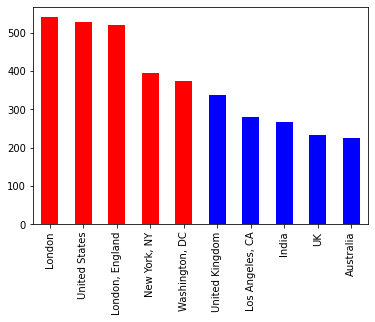

In [311]:


from matplotlib.figure import figaspect
country_location = data['Location'].value_counts().index

colors_location = ['red' if (x in country_location[:5]) else 'blue' for x in country_location]


data['Location'].value_counts()[0:10].plot(kind='bar',alpha =1,color=colors_location);


In [312]:


!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [313]:
import neattext.functions as nfx

In [314]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [315]:

data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_urls)


In [316]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
40797  One fallout is for sure due to the #COVID2019 ...   
36477  Janey Williams opens her refrigerator and star...   
33975  The #covid19 pandemic has caused serious disru...   
13013  Sending a shout out to the forgotten heroes in...   
3303   Grocery stores are seeing "4th of July level s...   
19854  church street food &amp; wine have put prices ...   
19924  When you try to get some online shopping at @O...   
9864   If the supermarket shelves continue to be as b...   
25372  If you are worried about being evicted or fore...   
29290  Markets plunge puts pension freedoms to the te...   

                                              neat_tweet  
40797  One fallout is for sure due to the #COVID2019 ...  
36477  Janey Williams opens her refrigerator and star...  
33975  The #covid19 pandemic has caused serious disru...  
13013  Sending a shout out to the forgotten heroes in...  
3303   Grocery stores are seeing "4th of July level s...  
19854  church street food &amp; wine have put prices ...  
19924  When you try to get some online shopping at @O...  
9864   If the supermarket shelves continue to be as b...  
25372  If you are worried about being evicted or fore...  
29290  Markets plunge puts pension freedoms to the te...

In [317]:

data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_numbers)

In [318]:



data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
23615  Today I joined Premier and my colleagues to an...   
12861  Looking back, I was pretty dumb as a teenager....   
21646  Be careful guy's always use mask mostly when y...   
15814  Supermarkets hiring hundreds of employees to m...   
28654  #COVID2019 Is Hurting Consumer Attitudes https...   
11316  Definitely would be some good episodes of supe...   
25562  After conducting a traffic stop on a stolen ve...   
26952  AP-NORC poll: About half of workers will lose ...   
2886   $KOPN COVID-19 just spawned mass market for VR...   
2243   Just like happened before in Australia, #COVID...   

                                              neat_tweet  
23615  Today I joined Premier and my colleagues to an...  
12861  Looking back, I was pretty dumb as a teenager....  
21646  Be careful guy's always use mask mostly when y...  
15814  Supermarkets hiring hundreds of employees to m...  
28654  #COVID Is Hurting Consumer Attitudes https://t...  
11316  Definitely would be some good episodes of supe...  
25562  After conducting a traffic stop on a stolen ve...  
26952  AP-NORC poll: About half of workers will lose ...  
2886   $KOPN COVID- just spawned mass market for VR. ...  
2243   Just like happened before in Australia, #COVID...

In [319]:

data['neat_tweet'] = data['OriginalTweet'].str.lower()

In [320]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
22989  #punerains Oh swell! If there was any psycholo...   
32290  "It is a scene playing out with increasing fre...   
19589  Based on the lack of TP there must be a lot of...   
2438   ?? Panic buying is not limited to supermarkets...   
3717   Help feed people during the People are filling...   
29768  Sanitizer na medical store ka wo berojgar tha ...   
10543  Working in logistics and having a team of peop...   
27577   Generally we are used to dealing with a suppl...   
25562  After conducting a traffic stop on a stolen ve...   
21509  COVID 19 As you rush to stock food amp drive u...   

                                              neat_tweet  
22989  #punerains oh swell! if there was any psycholo...  
32290  "it is a scene playing out with increasing fre...  
19589  based on the lack of tp there must be a lot of...  
2438   ?? panic buying is not limited to supermarkets...  
3717   help feed people during the people are filling...  
29768  sanitizer na medical store ka wo berojgar tha ...  
10543  working in logistics and having a team of peop...  
27577   generally we are used to dealing with a suppl...  
25562  after conducting a traffic stop on a stolen ve...  
21509  covid 19 as you rush to stock food amp drive u...

In [321]:
 data['extracted_hashtags']=data['OriginalTweet'].apply(nfx.extract_hashtags)

In [322]:
data.loc[:,['OriginalTweet','extracted_hashtags']].sample(10)

OriginalTweet  \
39416  also I think grocery stores would benefit from...   
92     As we often see during major news events, crim...   
3560   Since we have people panic-buying and hoarding...   
24807  Between 60 to 70 of the U S economy is driven ...   
4879   After the Virus: 10 emerging #Consumer #Trends...   
4965   People talk about a lockdown or quarantine but...   
27109  Italy s outbreak is two weeks ahead of Britain...   
30564  Don't let your budget planning be interrupted,...   
13808  Hindustan Unilever to slash prices of hygiene ...   
33516  Crude prices could go negative while Alberta s...   

                                      extracted_hashtags  
39416                                                 []  
92                                                    []  
3560   [#food,, #Republicans,, #GOP, #coronavirus, #I...  
24807                                                 []  
4879   [#Consumer, #Trends, #coronavirus, #marketrese...  
4965                              [#Coronavirus, #Texas]  
27109                                                 []  
30564                            [#WeAreStillHereForYou]  
13808                                                 []  
33516                                                 []

In [323]:
data['neat_tweet']=data['OriginalTweet'].apply(nfx.remove_hashtags)

In [324]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
18077  #COVID19 epidemic once again proves that manki...   
4636   a friend just told me that the supermarket she...   
33785  @ChinaDaily #China also infected millions with...   
4324    It s a really sensible move because money is ...   
26167  GT Wales provide food parcels to households in...   
28064  People are in the hospital scared and dying al...   
8876   @pmabray IÂm talking to supermarket till oper...   
26339  List of supermarkets grocery shops and vegetab...   
5714   NOW HIRING: As communities look to their groce...   
40019  New Jersey Division of Alcoholic Beverage Cont...   

                                              neat_tweet  
18077    epidemic once again proves that mankind is a...  
4636   a friend just told me that the supermarket she...  
33785  @ChinaDaily   also infected millions with   af...  
4324    It s a really sensible move because money is ...  
26167  GT Wales provide food parcels to households in...  
28064  People are in the hospital scared and dying al...  
8876   @pmabray IÂm talking to supermarket till oper...  
26339  List of supermarkets grocery shops and vegetab...  
5714   NOW HIRING: As communities look to their groce...  
40019  New Jersey Division of Alcoholic Beverage Cont...

In [325]:
data['neat_tweet']=data['neat_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [326]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
33061  Just a thought. But would it be possible to st...   
6831   Several more national retailers have temporari...   
25487  U.S consumer confidence slips sharply in March...   
7040   Applied to some supermarket stores. Now I'm th...   
40436  More than 22,000 Americans &amp; 11,000 Britis...   
29785  We are almost half-way done with COVID-19 Lock...   
28789  @RKHTV Hey Ryan, would you mind suggesting my ...   
31176  Please sign our joint petition calling on the ...   
32435  The global economic slowdown which has already...   
7621   Food banks have for years been increasing the ...   

                                              neat_tweet  
33061  Just a thought. But would it be possible to st...  
6831   Several more national retailers have temporari...  
25487  U.S consumer confidence slips sharply in March...  
7040   Applied to some supermarket stores. Now I'm th...  
40436  More than 22,000 Americans &amp; 11,000 Britis...  
29785  We are almost half-way done with COVID-19 Lock...  
28789    Hey Ryan, would you mind suggesting my next ...  
31176  Please sign our joint petition calling on the ...  
32435  The global economic slowdown which has already...  
7621   Food banks have for years been increasing the ...

In [327]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_multiple_spaces)

In [328]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_urls)

In [329]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_puncts)

In [330]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

OriginalTweet  \
18118  I spoke with the owners of about shifting gear...   
29675  Breaking Important News Flash: Hand sanitizer ...   
3954   If they do give you a thousand dollars for #Co...   
38694  Waiting to get inside the supermarket \r\r\n#C...   
38031  Consumer Finance Protection Bureau press relea...   
5356   #MeekMill reminds us that everyone doesnÂt ha...   
29659  Amid COVID-19, unemployment spike highest sinc...   
39387  Dropping fuel prices during COVID-19, but shou...   
25283  Norwegian Sovereign Wealth Fund doubles its sh...   
38456  Best of Â Question of the Day:  Why Is COVID-...   

                                              neat_tweet  
18118  I spoke with the owners of about shifting gear...  
29675  Breaking Important News Flash: Hand sanitizer ...  
3954   If they do give you a thousand dollars for rel...  
38694             Waiting to get inside the supermarket   
38031  Consumer Finance Protection Bureau press relea...  
5356    reminds us that everyone doesnÂt have the mo...  
29659  Amid COVID19 unemployment spike highest since ...  
39387  Dropping fuel prices during COVID19 but should...  
25283  Norwegian Sovereign Wealth Fund doubles its sh...  
38456  Best of Â Question of the Day: Why Is COVID19...

In [331]:
data['neat_tweet'] = data['neat_tweet'].apply(lambda x: nfx.remove_stopwords(x,lang='en'))

#**Tokenization**

In [332]:
tokenized_tweet = data['neat_tweet'].apply(lambda x: x.split())

In [333]:

tokenized_tweet.sample(3)

34618    [small, queuenotcant, supermarket, herebut, su...
27991    [Panic, buying, raises, concerns, families, fa...
2339     [Fuck, left, shelves, barmy, bastards, stock, ...
Name: neat_tweet, dtype: object

In [334]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [335]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [336]:
data['neat_tweet'] = tokenized_tweet

#**Wordplay**

In [337]:
pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [338]:
from wordcloud import WordCloud

import wikipedia


In [339]:
all_words = ' '.join(text for text in data['neat_tweet'])

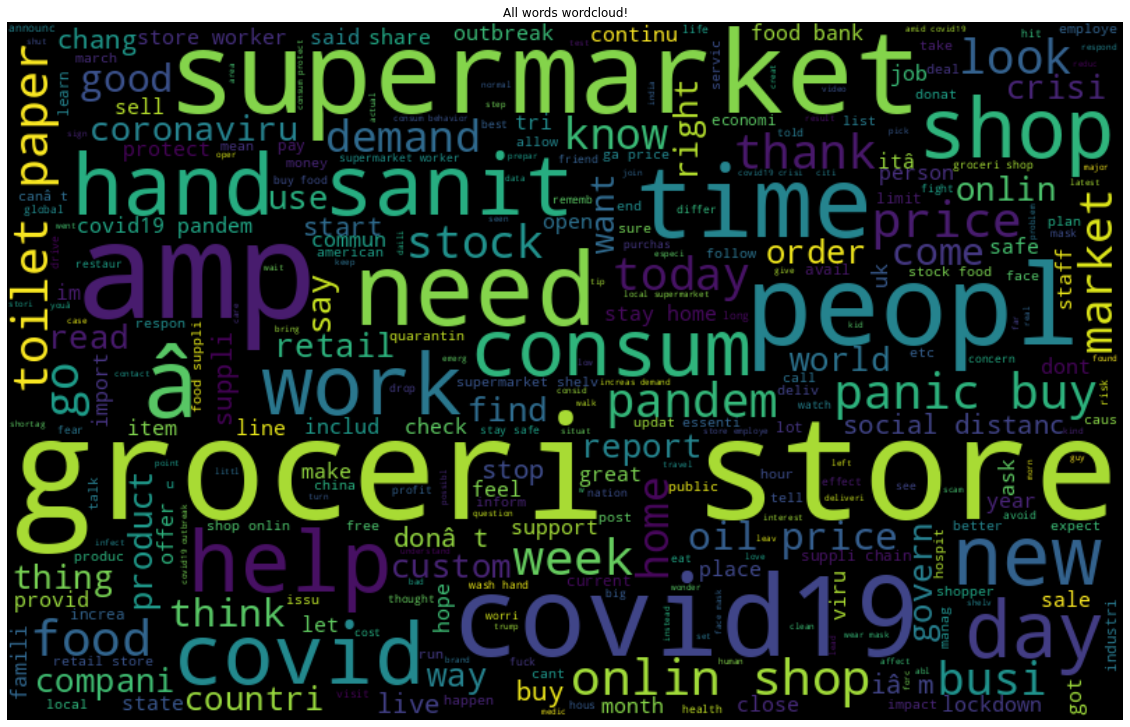

In [340]:
all_words_cloud = WordCloud(width=800, height=500, max_font_size=200,max_words=300).generate(all_words)
plt.figure(figsize=(20, 15))
plt.title('All words wordcloud!')

plt.imshow(all_words_cloud, interpolation="bilinear")
plt.axis('off');

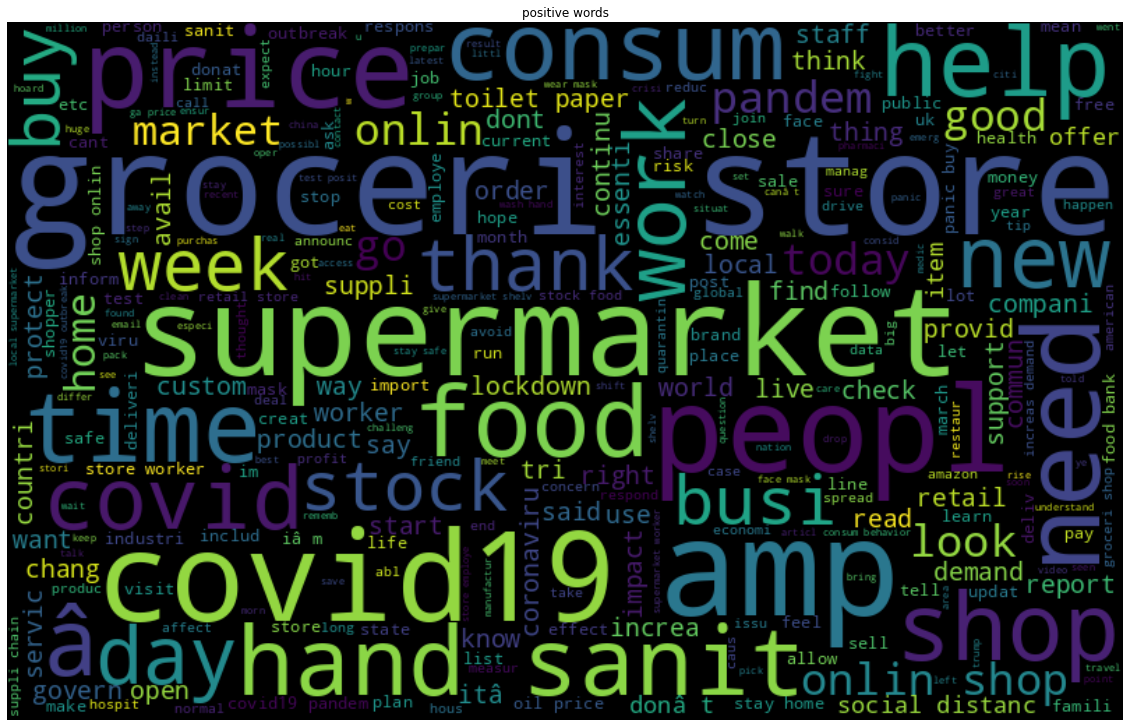

In [341]:
positive_words = ' '.join(text for text in data[data['Sentiment']=='Positive']['neat_tweet'])


positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(positive_words)
plt.figure(figsize=(20, 15))
plt.title('positive words')
plt.imshow(positive_words_cloud, interpolation="bilinear")
plt.axis('off');

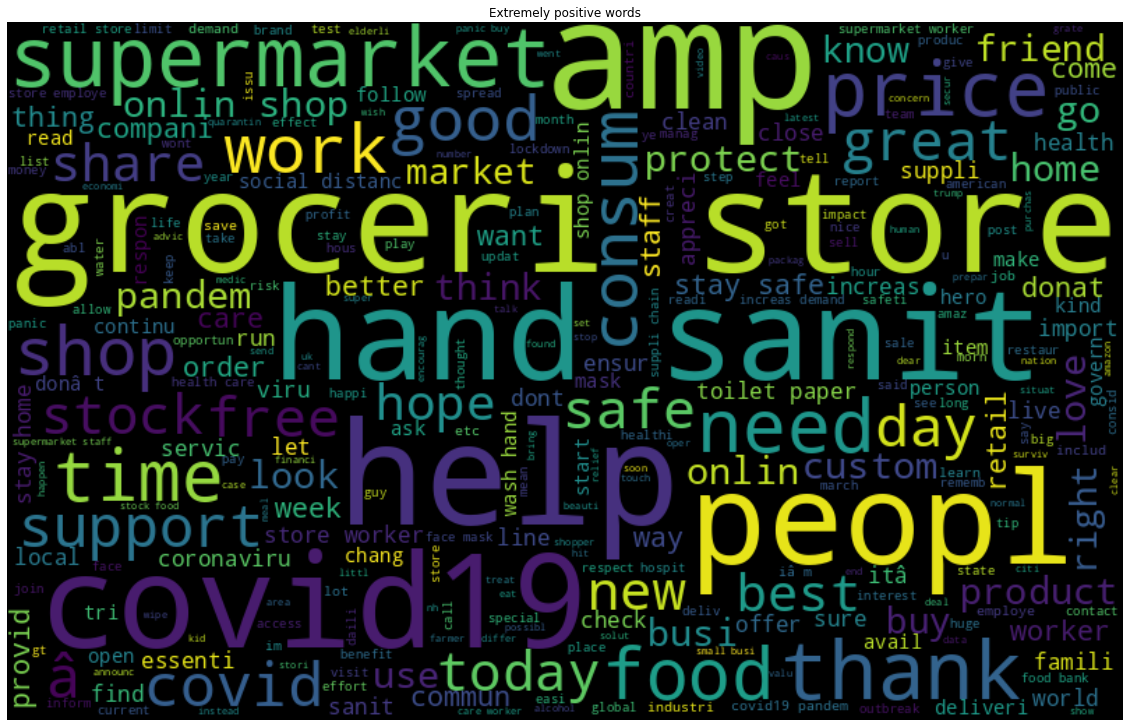

In [342]:

extremly_positive_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Positive']['neat_tweet'])


extremly_positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_positive_words)
plt.figure(figsize=(20, 15))
plt.title('Extremely positive words')
plt.imshow(extremly_positive_words_cloud, interpolation="bilinear")
plt.axis('off');

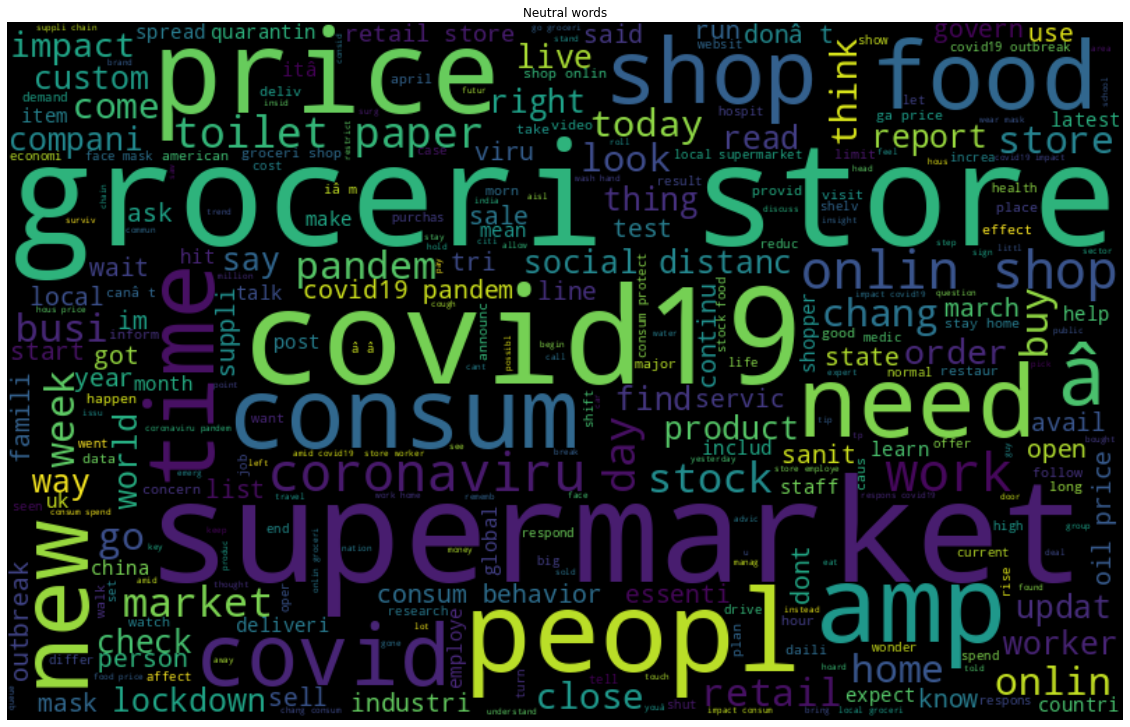

In [343]:
neutral_words = ' '.join(text for text in data[data['Sentiment']=='Neutral']['neat_tweet'])


neutral_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(neutral_words)
plt.figure(figsize=(20, 15))
plt.title('Neutral words')
plt.imshow(neutral_words_cloud, interpolation="bilinear")
plt.axis('off');

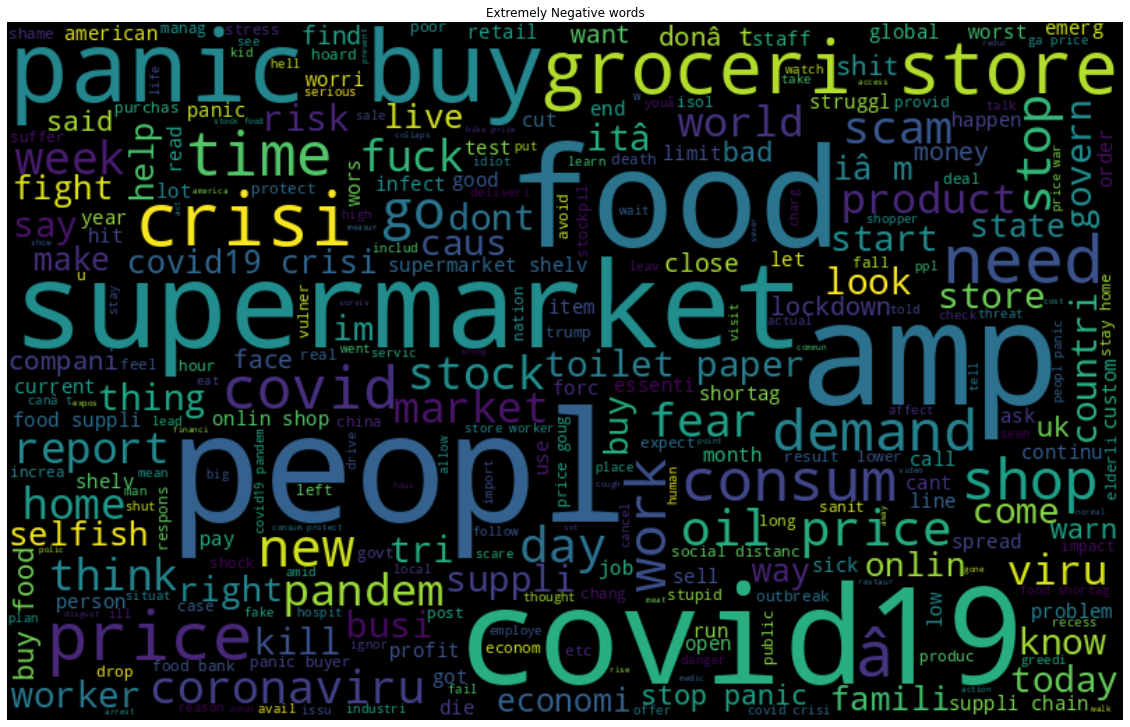

In [344]:
extremly_negative_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Negative']['neat_tweet'])


extremly_negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_negative_words)
plt.figure(figsize=(20, 15))
plt.title('Extremely Negative words')
plt.imshow(extremly_negative_words_cloud, interpolation="bilinear")
plt.axis('off');

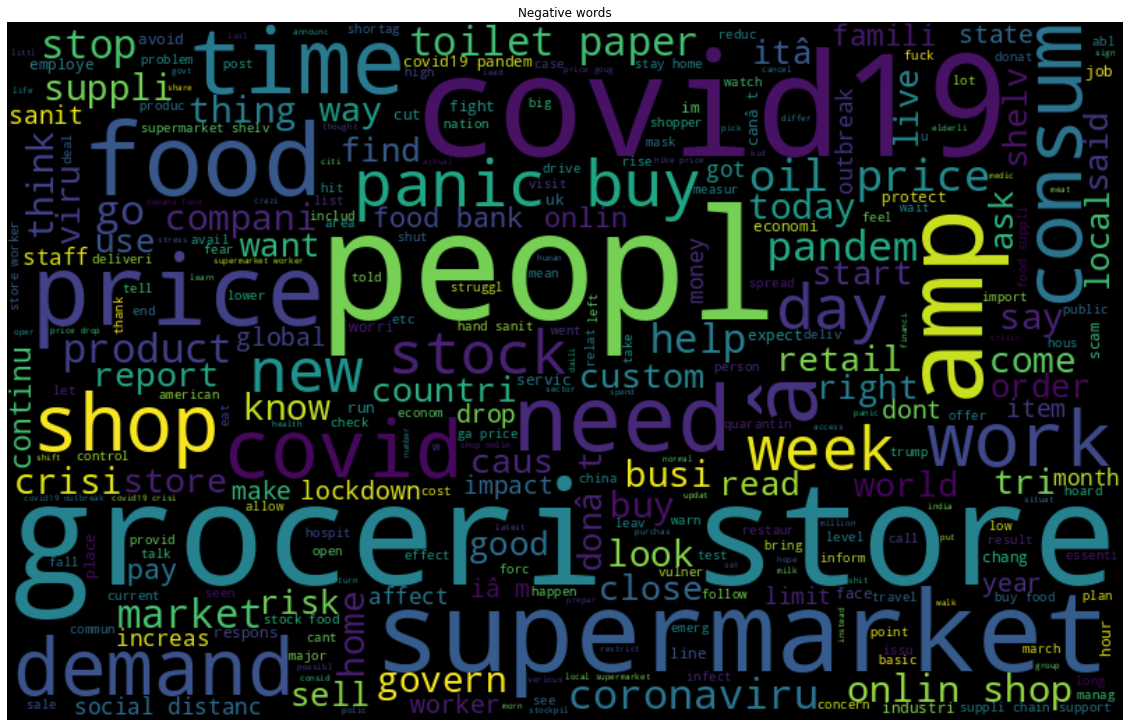

In [345]:
negative_words = ' '.join(text for text in data[data['Sentiment']=='Negative']['neat_tweet'])


negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(negative_words)
plt.figure(figsize=(20, 15))
plt.title('Negative words')
plt.imshow(negative_words_cloud, interpolation="bilinear")
plt.axis('off');

In [346]:
data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet','extracted_hashtags'],axis =1,inplace=True)

In [347]:

data.head()

Sentiment                                         neat_tweet
0             Neutral                                                   
1            Positive  advic talk neighbour famili exchang phone numb...
2            Positive  coronaviru australia: woolworth elderli disabl...
3            Positive  food stock dont panic food need stay calm stay...
4  Extremely Negative  readi supermarket outbreak im paranoid food st...

In [348]:
X = data['neat_tweet']
y = data['Sentiment']

In [349]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Sentiment']= label_encoder.fit_transform(data['Sentiment'])
  
data['Sentiment'].unique()

array([3, 4, 0, 2, 1])

In [350]:
data.head()

Sentiment                                         neat_tweet
0          3                                                   
1          4  advic talk neighbour famili exchang phone numb...
2          4  coronaviru australia: woolworth elderli disabl...
3          4  food stock dont panic food need stay calm stay...
4          0  readi supermarket outbreak im paranoid food st...

In [351]:
data.tail()

Sentiment                                         neat_tweet
41152          3  airlin pilot offer stock supermarket shelv loc...
41153          0  respons complaint provid cite covid19 relat de...
41154          4  know itâ get tough ration toilet paper martin...
41155          3                  wrong smell hand sanit start turn
41156          2  new/us rift go $70000 amazon rn normal market ...

In [352]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [353]:
print(f'train shape { X_train.shape} and { y_train.shape} ')
print(f'test shape { X_test.shape} and { y_test.shape} ')

train shape (32925,) and (32925,) 
test shape (8232,) and (8232,) 


In [354]:
data['neat_tweet'].isnull().sum()

0

In [355]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [356]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [357]:
from sklearn.naive_bayes import MultinomialNB
naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(X_train,y_train)
NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.7000151860288535
Validation accuracy Score :  0.46379980563654033
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.62      0.46       655
Extremely Positive       0.41      0.59      0.49       936
          Negative       0.51      0.42      0.46      2416
           Neutral       0.29      0.67      0.40       670
          Positive       0.61      0.39      0.48      3555

          accuracy                           0.46      8232
         macro avg       0.44      0.54      0.46      8232
      weighted avg       0.52      0.46      0.47      8232



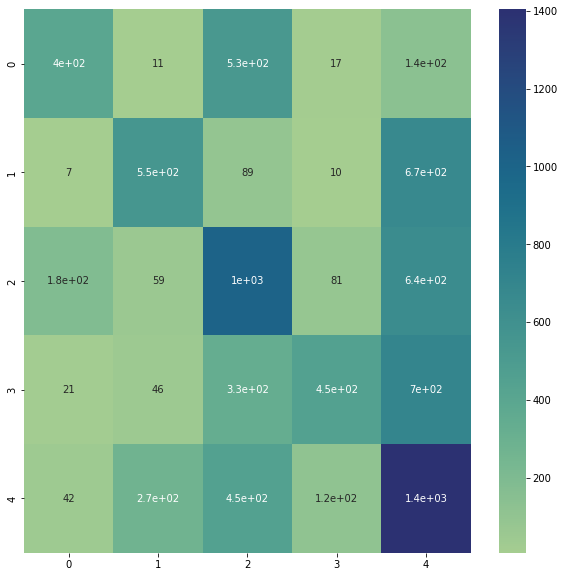

In [358]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,NB_prediction),annot= True,cmap="crest");

In [359]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
print(train_accuracy[i]) 
print(test_accuracy[i] )

0.3136826119969628
0.2597181729834791


In [360]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score   : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score   :  0.8365072133637054
Validation accuracy Score :  0.5773809523809523
                    precision    recall  f1-score   support

Extremely Negative       0.68      0.67      0.67      1115
Extremely Positive       0.70      0.65      0.67      1417
          Negative       0.45      0.50      0.48      1763
           Neutral       0.79      0.59      0.68      2063
          Positive       0.43      0.52      0.47      1874

          accuracy                           0.58      8232
         macro avg       0.61      0.59      0.59      8232
      weighted avg       0.60      0.58      0.59      8232



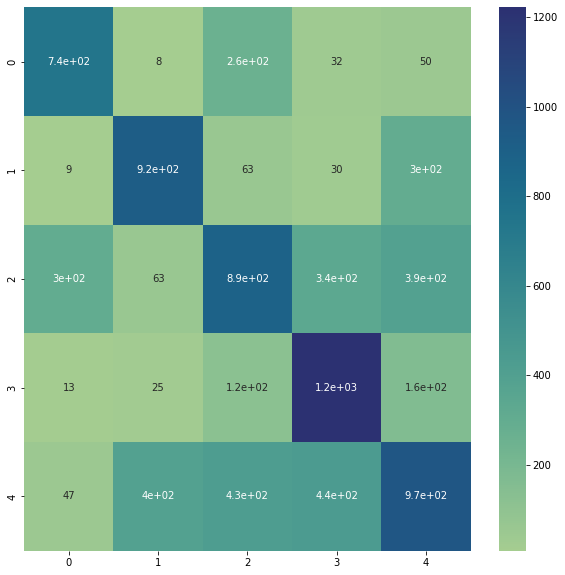

In [361]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,sgd_prediction),annot= True,cmap="crest");

In [362]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier(tree_method='hist')

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))


Training accuracy Score    :  0.6956416097190584
Validation accuracy Score :  0.576044703595724
              precision    recall  f1-score   support

           0       0.53      0.68      0.59       842
           1       0.52      0.72      0.60       957
           2       0.46      0.55      0.50      1651
           3       0.82      0.55      0.66      2303
           4       0.57      0.53      0.55      2479

    accuracy                           0.58      8232
   macro avg       0.58      0.61      0.58      8232
weighted avg       0.61      0.58      0.58      8232



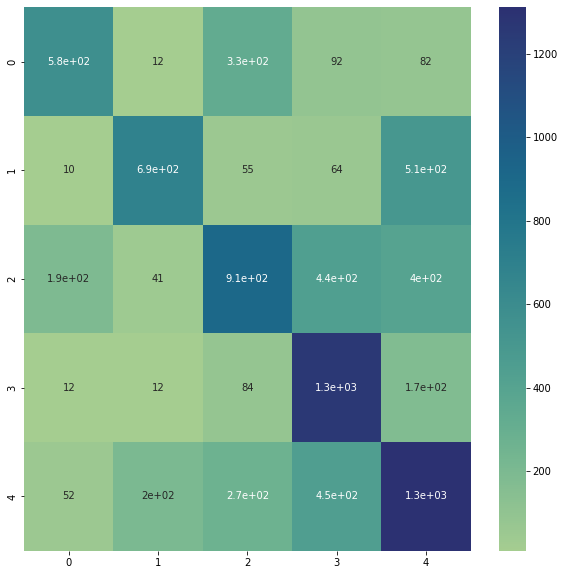

In [363]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, xgb_prediction),annot= True,cmap="crest");

In [364]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9042672741078208
Validation accuracy Score :  0.6020408163265306
              precision    recall  f1-score   support

           0       0.48      0.76      0.59       693
           1       0.51      0.78      0.62       866
           2       0.56      0.54      0.55      2073
           3       0.73      0.65      0.69      1732
           4       0.66      0.53      0.59      2868

    accuracy                           0.60      8232
   macro avg       0.59      0.65      0.61      8232
weighted avg       0.62      0.60      0.60      8232



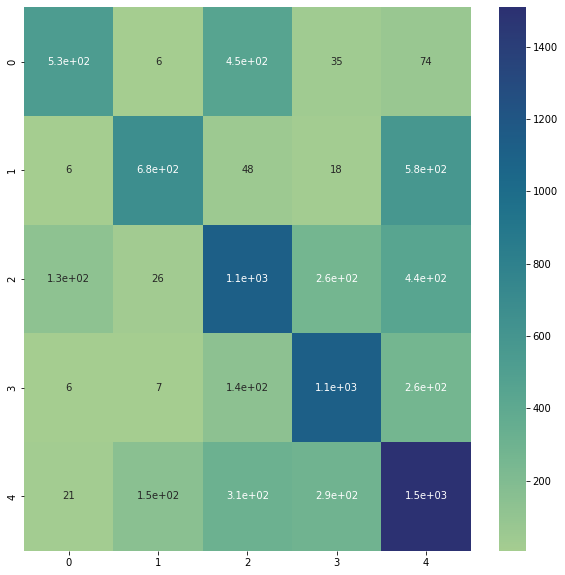

In [365]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, svc_prediction ),annot= True,cmap="crest");

In [366]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.8982839787395596
Validation accuracy Score :  0.6186831875607386
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       961
           1       0.64      0.71      0.67      1196
           2       0.54      0.56      0.55      1902
           3       0.74      0.64      0.69      1782
           4       0.60      0.57      0.58      2391

    accuracy                           0.62      8232
   macro avg       0.63      0.64      0.63      8232
weighted avg       0.62      0.62      0.62      8232



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


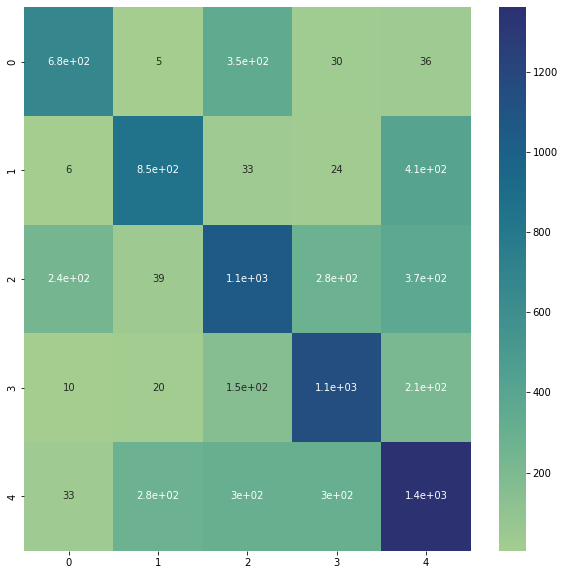

In [367]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,logreg_prediction  ),annot= True,cmap="crest");

In [368]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
               'Naive Bayes', 
              'Stochastic Gradient Decent','xgboost',],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
               NB_accuracy, 
              sgd_accuracy,xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
1         Logistic Regression       0.618683
0     Support Vector Machines       0.602041
3  Stochastic Gradient Decent       0.577381
4                     xgboost       0.576045
2                 Naive Bayes       0.463800

In [369]:
data.tail()

Sentiment                                         neat_tweet
41152          3  airlin pilot offer stock supermarket shelv loc...
41153          0  respons complaint provid cite covid19 relat de...
41154          4  know itâ get tough ration toilet paper martin...
41155          3                  wrong smell hand sanit start turn
41156          2  new/us rift go $70000 amazon rn normal market ...

In [370]:
data_bin = data.copy()

In [371]:
data_bin['Sentiment'] = data_bin['Sentiment'].map({3:0,4:0,1:0,2:1,0:1})

In [372]:
data_bin.head()

Sentiment                                         neat_tweet
0          0                                                   
1          0  advic talk neighbour famili exchang phone numb...
2          0  coronaviru australia: woolworth elderli disabl...
3          0  food stock dont panic food need stay calm stay...
4          1  readi supermarket outbreak im paranoid food st...

In [373]:
data_bin['Sentiment'].value_counts()

0    25759
1    15398
Name: Sentiment, dtype: int64

In [374]:
X= data_bin['neat_tweet']
y = data_bin['Sentiment']

In [375]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [376]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [377]:
from sklearn.naive_bayes import MultinomialNB
naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(X_train,y_train)
NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Test accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

Training accuracy Score    :  0.8680030372057707
Test accuracy Score :  0.7909378036929058
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      5474
           1       0.67      0.75      0.71      2758

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.77      8232
weighted avg       0.80      0.79      0.79      8232



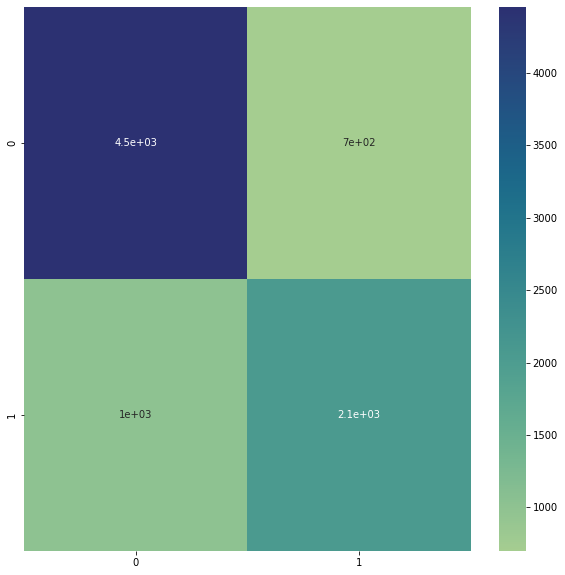

In [378]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,NB_prediction ),annot= True,cmap="crest");

In [379]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Test accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9997570235383447
Test accuracy Score :  0.826287657920311
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      5579
           1       0.70      0.81      0.75      2653

    accuracy                           0.83      8232
   macro avg       0.80      0.82      0.81      8232
weighted avg       0.84      0.83      0.83      8232



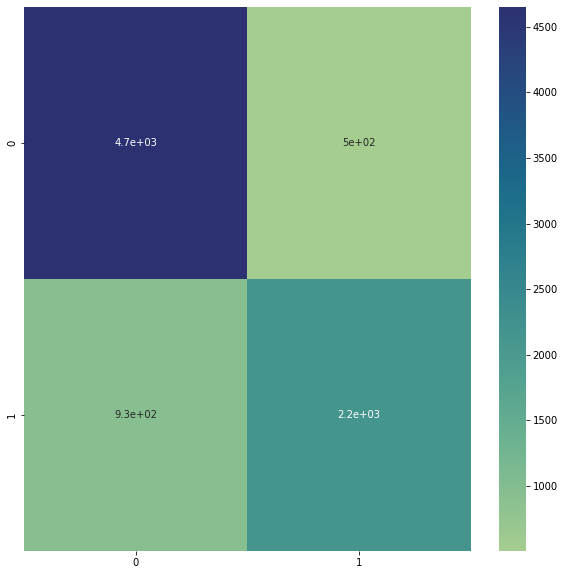

In [380]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,rf_prediction),annot= True,cmap="crest");

In [381]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Test accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9406226271829916
Test accuracy Score :  0.8623663751214772
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5500
           1       0.76      0.86      0.81      2732

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


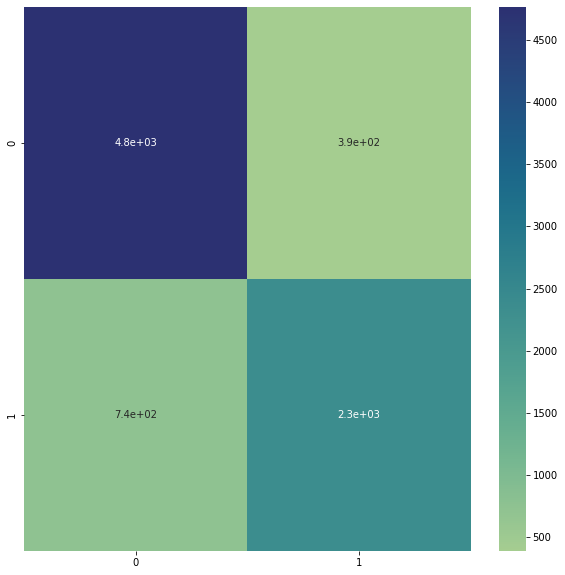

In [382]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,logreg_prediction),annot= True,cmap="crest");

In [383]:
import xgboost as xgb
xgboost_clf = xgb.XGBClassifier()
xgboost_clf.fit(X_train, y_train)
xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy score: ",xgboost_clf.score(X_train,y_train))
print("Test accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy score:  0.8503568716780562
Test accuracy Score :  0.8137755102040817
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      5918
           1       0.63      0.83      0.72      2314

    accuracy                           0.81      8232
   macro avg       0.78      0.82      0.79      8232
weighted avg       0.84      0.81      0.82      8232



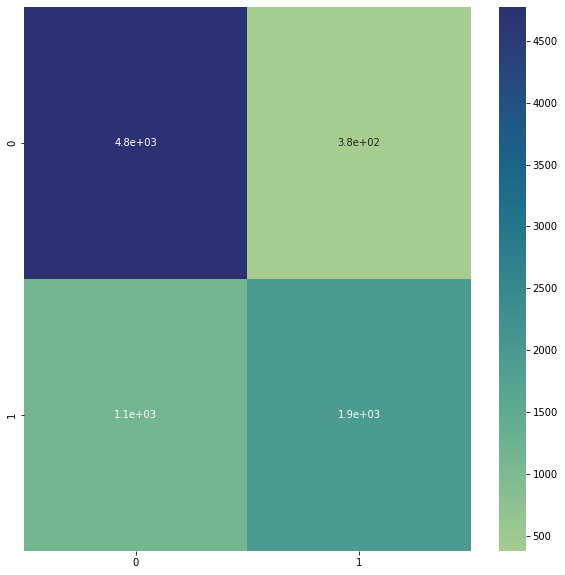

In [384]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,xgb_prediction),annot= True,cmap="crest");

In [385]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.958663629460896
Validation accuracy Score :  0.8401360544217688
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      5771
           1       0.69      0.86      0.76      2461

    accuracy                           0.84      8232
   macro avg       0.81      0.85      0.82      8232
weighted avg       0.86      0.84      0.84      8232



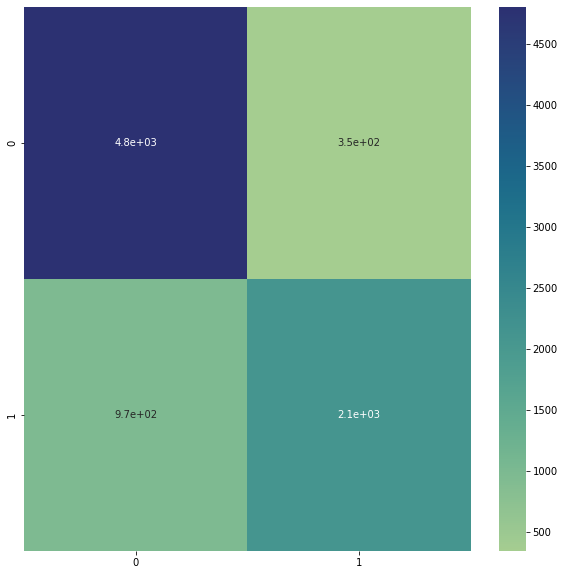

In [386]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,svc_prediction),annot= True,cmap="crest");

In [387]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)
sgd_clf.fit(X_train,y_train)
sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score   : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))




Training accuracy Score   :  0.9389825360668185
Validation accuracy Score :  0.8652818270165209
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5398
           1       0.78      0.85      0.81      2834

    accuracy                           0.87      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.87      0.87      8232



In [388]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
4  Stochastic Gradient Decent       0.865282
1         Logistic Regression       0.862366
0     Support Vector Machines       0.840136
2               Random Forest       0.826288
5                     XGBoost       0.813776
3                 Naive Bayes       0.790938

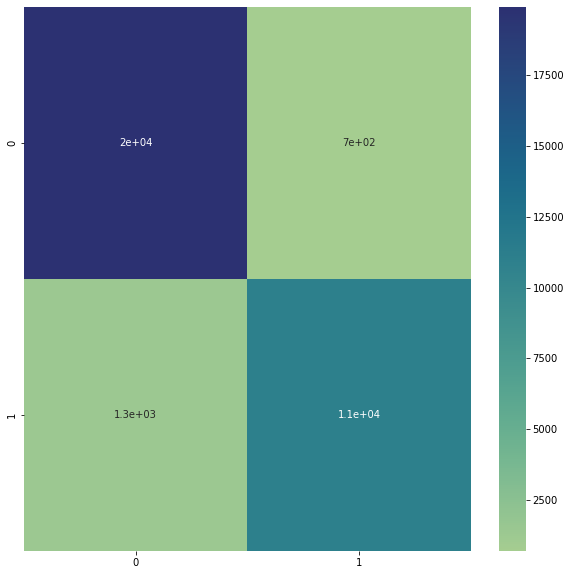

In [389]:
# Confusion matrix for training set with SGDclassifier
plt.figure(figsize=(10,10))
train_preds = sgd_clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train,train_preds),annot= True,cmap="crest");

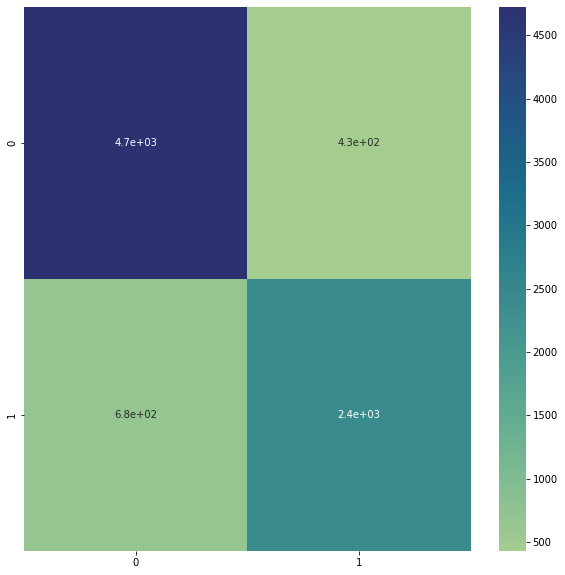

In [390]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,sgd_prediction),annot= True,cmap="crest");

#** Conclusion**
From above discussion we first evaluated the the model on the basis of multipleclassification where we have taken multiple sentiments into consideration which includes positive ,negative,neutral, extremely positive and extremely negative sentiment.

* After applying various classification algorithm we come to a conclusion that the best is logistic classification with a score of 61 percent.
* After multiple classification we divided our data into binary classification, in which extremely positive, positive and netral are taken as 0 and extremely negative and negative are taken as 1 for classification.
* The output after Deploying various Model into the system the best algorithm comes out to be Stochastic Gradient Descent. 
* We have seen confusion matrix for individual cases prediction and seen that lighter part that is i
has less frequency and darker part has high frequency.